In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor

In [2]:
df = pd.read_csv("data/kc_house_data.csv")
df.head()
# df.columns

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#Let's select a couple of features for Simplicity
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

X = df.loc[:, features]
y = df.loc[:, 'price'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Bagged Trees

In [5]:
reg = BaggingRegressor(n_estimators=100,
                      random_state=0)

In [6]:
reg.fit(X_train, y_train)

BaggingRegressor(n_estimators=100, random_state=0)

In [7]:
# Returns a NumPy Array
# Predict for One Observation
reg.predict(X_test.iloc[0].values.reshape(1, -1))

c:\Users\adrie\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


array([309683.3])

In [8]:
reg.predict(X_test[0:10])

array([ 309683.3 , 1563300.7 ,  543898.06,  593227.5 ,  635454.49,
        386451.  ,  337970.35,  463089.59,  662717.31, 1563274.36])

In [9]:
y_test[0:10]

array([ 297000., 1578000.,  562100.,  631500.,  780000.,  485000.,
        340000.,  335606.,  425000.,  490000.])

### Measuring Model Performance

In [10]:
score = reg.score(X_test, y_test)
print(score)

0.735207401619008


### Tuning n_estimators (Number of Decision Trees)

A tuning parameter for bagged trees is **n_estimators**, which represents the number of trees that should be grown. 

In [11]:
# List of values to try for n_estimators:
estimator_range = [1] + list(range(10, 150, 20))

scores = []

for estimator in estimator_range:
    reg = BaggingRegressor(n_estimators=estimator, random_state=0)
    reg.fit(X_train, y_train)
    scores.append(reg.score(X_test, y_test))

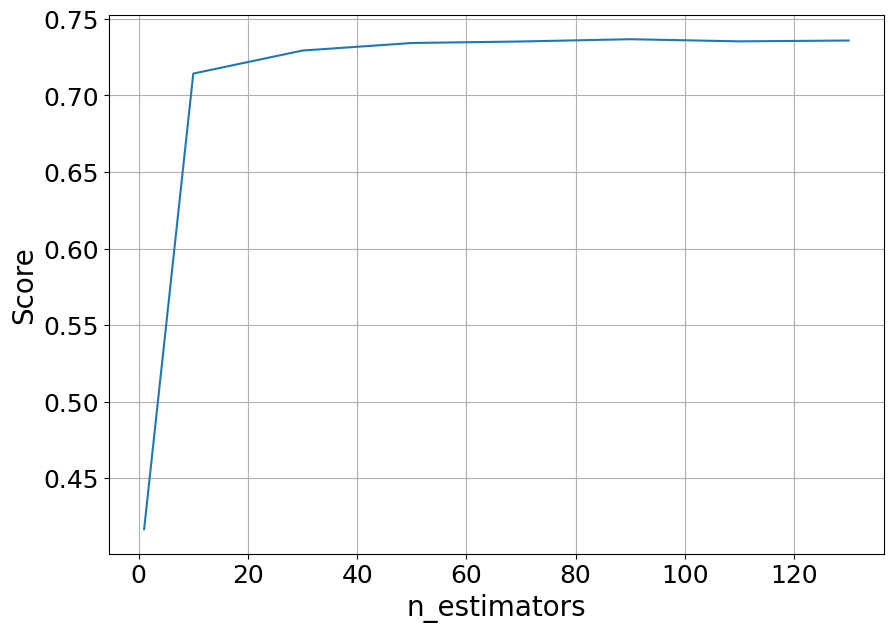

In [12]:
plt.figure(figsize = (10,7))
plt.plot(estimator_range, scores);

plt.xlabel('n_estimators', fontsize =20);
plt.ylabel('Score', fontsize = 20);
plt.tick_params(labelsize = 18)
plt.grid()

Notice that the score stops improving after a certain number of estimators (decision trees). One way to get a better score would be to include more features in the features matrix.